# Medium Article - Build Your First Neural Network
https://medium.com/intuitive-deep-learning/build-your-first-neural-network-to-predict-house-prices-with-keras-eb5db60232c


In [0]:
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Step 1 - Loading Data

In [3]:
from google.colab import files
upload = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [4]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


# Step 2 - Cleaning Data

Convert panda to array.

In [5]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [0]:
x = dataset[:,0:10]
y = dataset[:, 10]

Normalize x array to improve training.

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_x = min_max_scaler.fit_transform(x)
scaled_x

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

# Step 3 - Test / Train Data

Last step in processing data which involves splitting dataset into a training set, a validation set and test set.

We now have a total of six variables for our datasets we will use:

*   x_train (10 input features, 70% of full dataset)
*   x_val (10 input features, 15% of full dataset)
*   x_test (10 input features, 15% of full dataset)
*   y_train (1 label, 70% of full dataset)
*   y_val (1 label, 15% of full dataset)
*   y_test (1 label, 15% of full dataset)

In [8]:
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(scaled_x, y, test_size = 0.3)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size = 0.5)
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Step 4 - Building and Training The Neural Network

In words, we want to have these layers:

*   Hidden layer 1: 32 neurons, ReLU activation
*   Hidden layer 2: 32 neurons, ReLU activation
*   Output Layer: 1 neuron, Sigmoid activation

![alt text](https://miro.medium.com/max/1366/1*n-SIfloaWQxvQ5XMgnKmRA.png)

In [0]:
# specifying our sequential model.
model = tf.keras.Sequential([tf.keras.layers.Dense(32, activation = 'relu', input_shape = (10,)),
                    tf.keras.layers.Dense(32, activation = 'relu'),
                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

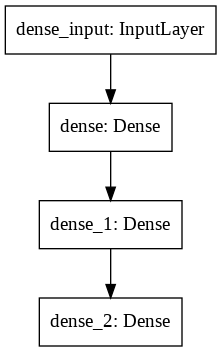

In [13]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [0]:
# configure the model
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [11]:
hist = model.fit(x_train, y_train,
                 batch_size = 32, epochs = 100,
                 validation_data = (x_val, y_val))

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.4951 - val_loss: 0.6820 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5000 - val_loss: 0.6755 - val_accuracy: 0.5297
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5088 - val_loss: 0.6702 - val_accuracy: 0.5297
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5333 - val_loss: 0.6656 - val_accuracy: 0.5753
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6047 - val_loss: 0.6611 - val_accuracy: 0.6301
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.6614 - val_loss: 0.6569 - val_accuracy: 0.7169
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7632 - val_loss: 0.6525 - val_accuracy: 0.7352
Epoch 8/100
3

In [12]:
model.evaluate(x_test, y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2207 - accuracy: 0.9361


0.9360730648040771

# Step 4 - Analyzing Loss and Accuracy

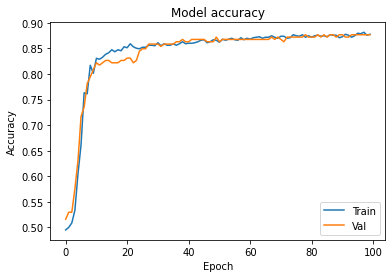

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

## Simulating Overfitting

Introducing regularization to formulate a neural network which badly overfits.

In [23]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

hist_2 = model_2.fit(x_train, y_train,
                     batch_size = 32, epochs = 100,
                     validation_data = (x_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 34ms/step - loss: 0.5199 - accuracy: 0.7583 - val_loss: 0.3885 - val_accuracy: 0.8584
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3775 - accuracy: 0.8532 - val_loss: 0.3312 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3364 - accuracy: 0.8630 - val_loss: 0.2876 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3136 - accuracy: 0.8708 - val_loss: 0.2845 - val_accuracy: 0.9041
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2820 - accuracy: 0.8914 - val_loss: 0.2687 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2717 - accuracy: 0.8894 - val_loss: 0.2423 - val_accuracy: 0.9132
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3030 - accuracy: 0.8659 - val_loss: 0.2713 - val_accuracy: 0.9041
Epoch 

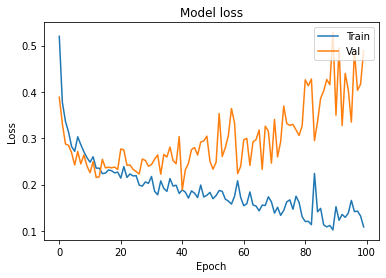

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

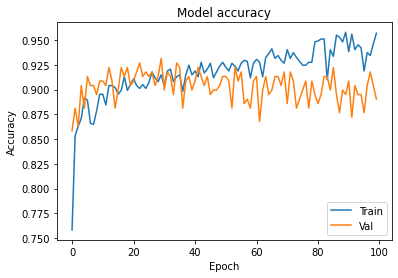

In [25]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()